In [44]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [18]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2,random_state=0)
print(X.shape,y.shape)

(200, 2) (200,)


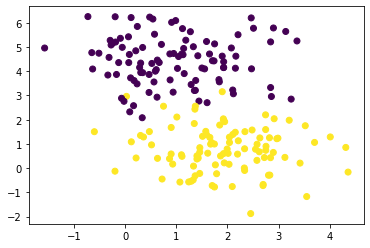

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

In [25]:
def gen_data(mean,std,size):
    data = np.array(mean) + np.random.randn(size,2)*std
    return data

In [86]:
X1 = gen_data(mean=(6,7),std=1,size=200)
y1 = np.zeros(X1.shape[0])
X2 = gen_data(mean=(3,3),std=1,size=200)
y2 = np.zeros(X2.shape[0])

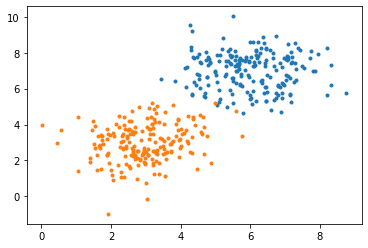

In [87]:
plt.plot(X1[:,0],X1[:,1],'.')
plt.plot(X2[:,0],X2[:,1],'.')

In [88]:
X = np.vstack([X1,X2])
y = np.hstack([y1,y2])
print(X.shape,y.shape)

(400, 2) (400,)


1.530045705497306
labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]
cluster_centers [[ 5.86750087  6.95651496]
 [ 2.90190326  3.05972198]
 [ 0.88221121 -1.07046634]]
labels_unique [0 1 2]
number of estimated clusters : 3


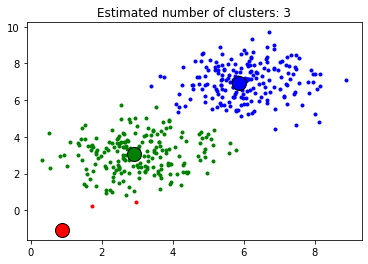

In [48]:
data = X
from sklearn.cluster import MeanShift, estimate_bandwidth
# 通过下列代码可自动检测bandwidth值
# 从data中随机选取1000个样本，计算每一对样本的距离，然后选取这些距离的0.2分位数作为返回值，当n_samples很大时，这个函数的计算量是很大的。
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=1000)
print(bandwidth)
# bin_seeding设置为True就不会把所有的点初始化为核心位置，从而加速算法
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
print("labels",labels)
cluster_centers = ms.cluster_centers_
print("cluster_centers",cluster_centers)
# 计算类别个数
labels_unique = np.unique(labels)
print("labels_unique")
n_clusters = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters)
# 画图
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()  # 清楚上面的旧图形
# cycle把一个序列无限重复下去
colors = cycle('bgrcmyk')
for k, color in zip(range(n_clusters), colors):
    # current_member表示标签为k的记为true 反之false
    current_member = labels == k
    cluster_center = cluster_centers[k]
    # 画点
    plt.plot(data[current_member, 0], data[current_member, 1], color + '.')
    #画圈
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color,  #圈内颜色
             markeredgecolor='k',  #圈边颜色
             markersize=14)  #圈大小
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [146]:
class MeanShift:
    def __init__(self,bandwidth,eps):
        self.bandwidth = bandwidth #小领域的距离长度
        self.cluster_locs = [] #每类中心点坐标
        self.visit_times = [] #每个样本点被各类访问次数
        self.eps = eps
    
    def fit(self,X):
        size = X.shape[0]
        is_visit = np.zeros(size,dtype=np.bool)
        while min(is_visit) == False: #所有数据点均访问过则结束
            #随机选择一个未访问的数据
            idx = np.random.choice(np.where(is_visit!=True)[0]) 
            x = X[idx]
            #此类中各个数据点被访问的次数
            cur_times = np.zeros(size,dtype=np.int)
            while True:
                #计算距离
                dis = np.sqrt(np.sum((X-x)**2,axis=1))
                #更新访问次数和是否访问过
                index = dis < self.bandwidth
                cur_times[index] += 1
                is_visit[index] = True
                #计算mean_shift
                mean_shift = np.mean((X-x)[dis < self.bandwidth],axis=0)
                if np.sum(mean_shift**2)< self.eps:
                    break
                x = x+mean_shift
            #类间合并
            has_merge = False
            for i in range(len(self.cluster_locs)):
                if np.sum((self.cluster_locs[i]-x)**2)<bandwidth:
                    self.visit_times[i] += cur_times
                    has_merge = True
                    break
            if not has_merge:
                self.cluster_locs.append(x)
                self.visit_times.append(cur_times)
        self.visit_times = np.array(self.visit_times)
        self.groups = np.argmax(self.visit_times,axis=0)

In [147]:
ms = MeanShift(1.5,0.001)
ms.fit(X)

In [149]:
ms.cluster_locs

[array([2.85390545, 2.86329438]), array([5.7512017 , 7.34731937])]

In [150]:
ms.groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

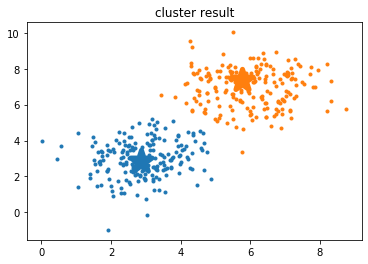

In [182]:
plt.title("cluster result")
for g in range(len(ms.cluster_locs)):
    plt.scatter([ms.cluster_locs[g][0]],[ms.cluster_locs[g][1]],marker="*",s=500,lw=5)
    idx = (ms.groups == g)
    plt.plot(X[idx][:,0],X[idx][:,1],'.')

In [ ]:
X